<a href="https://colab.research.google.com/github/KenDaupsey/Comparing-Multiclassification-Models-Using-Python/blob/main/Comparing_Multiclassification_Models_Using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *** Comparing Multiclassification Models Using Python ***

# ** Complete Project Implementation **

Classifier: Logistic Regression
Accuracy: 0.9700
Classification Report:
              precision    recall  f1-score   support

     Average       0.93      1.00      0.96        25
        Good       0.97      0.94      0.96        68
        Poor       0.98      0.98      0.98       107

    accuracy                           0.97       200
   macro avg       0.96      0.97      0.97       200
weighted avg       0.97      0.97      0.97       200

Confusion Matrix:
[[ 25   0   0]
 [  2  64   2]
 [  0   2 105]]


Classifier: K-Nearest Neighbors
Accuracy: 0.9000
Classification Report:
              precision    recall  f1-score   support

     Average       0.75      0.60      0.67        25
        Good       0.96      0.96      0.96        68
        Poor       0.89      0.93      0.91       107

    accuracy                           0.90       200
   macro avg       0.87      0.83      0.85       200
weighted avg       0.90      0.90      0.90       200

Confusion Matrix:
[[ 15   1 

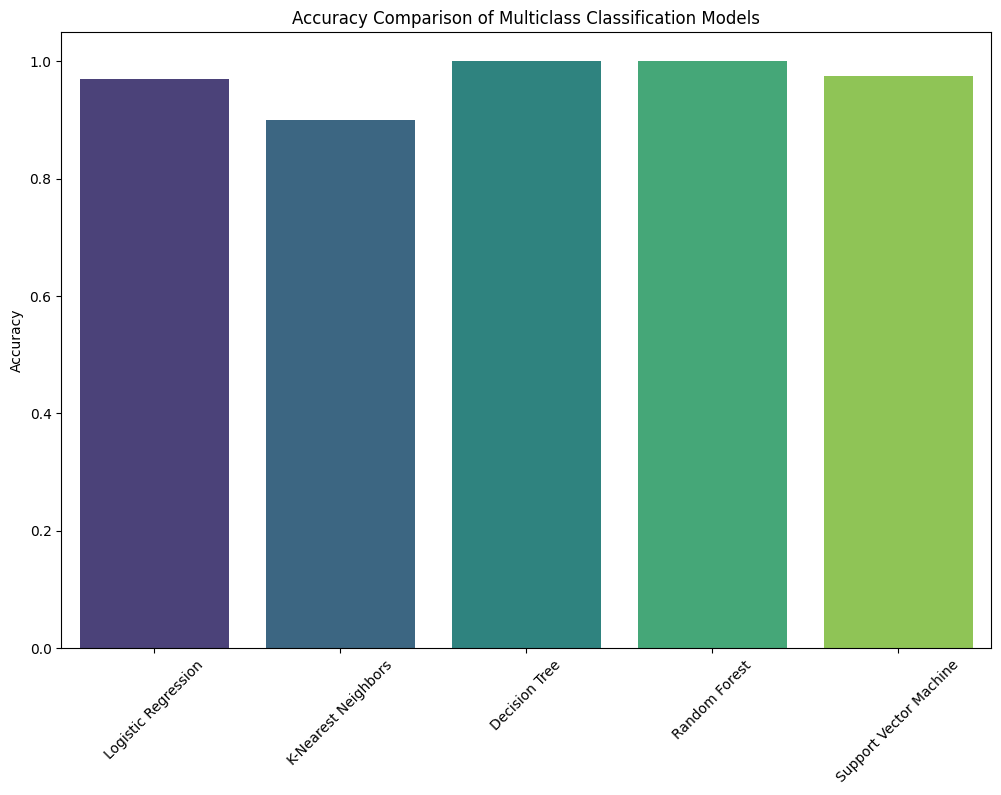

In [2]:
#STEP 1: Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

### Load Dataset
import pandas as pd ## If you haven't already done so
url= "https://raw.githubusercontent.com/KenDaupsey/Multiclass-Classification-using-Logistic-Regression/main/EconomicWellbeing_Data.csv"
df= pd.read_csv(url)
df.head()

# STEP 3: Select features and target variable
features = ['Age', 'Education_Level', 'Marital_Status', 'Credit_Score', 'Annual_Income', 'Savings_Amount', 'Income_Category']
target = 'Health_Status'

X = df[features]
y = df[target]

# STEP 4:  Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#Define preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Age', 'Credit_Score', 'Annual_Income', 'Savings_Amount']),
        ('cat', OneHotEncoder(drop='first'), ['Education_Level', 'Marital_Status', 'Income_Category'])
    ])

#Create a dictionary of classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(decision_function_shape='ovo', random_state=42)
}

# Loop through each classifier and evaluate its performance
results = {}
for name, classifier in classifiers.items():
    # Create a pipeline with preprocessing and the current classifier
    model = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', classifier)])

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Save the results
    results[name] = {'accuracy': accuracy, 'classification_report': classification_rep, 'confusion_matrix': conf_matrix}

# STEP 5: Display results
for name, result in results.items():
    print(f"Classifier: {name}")
    print(f"Accuracy: {result['accuracy']:.4f}")
    print("Classification Report:")
    print(result['classification_report'])
    print("Confusion Matrix:")
    print(result['confusion_matrix'])
    print("\n")

# STEP 6: Plot results
plt.figure(figsize=(12, 8))
accuracy_values = [result['accuracy'] for result in results.values()]
sns.barplot(x=list(results.keys()), y=accuracy_values, hue=list(results.keys()), palette='viridis', legend=False)
plt.title('Accuracy Comparison of Multiclass Classification Models')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()

*** The End ***